# Primetrade.ai – Round 0 Assignment  
## Trader Performance vs Market Sentiment Analysis  
Author: Juily Bagate  
Date: 2026-02-20  

Objective:  
Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid to uncover actionable trading insights.

**Google Colab Setup**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Setup Complete")

Setup Complete


**Load the CSV Files**

In [18]:
trades = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.head()

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [19]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**Data Understanding**

Rows & Columns

In [20]:
print("Trades dataset info:")
trades.info()

print("\nSentiment dataset info:")
sentiment.info()

Trades dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtyp

Missing Values

In [21]:
print("Missing values in trades:")
print(trades.isnull().sum())

print("\nMissing values in sentiment:")
print(sentiment.isnull().sum())

Missing values in trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64


Duplicates

In [22]:
print("Duplicate rows in trades:", trades.duplicated().sum())
print("Duplicate rows in sentiment:", sentiment.duplicated().sum())

Duplicate rows in trades: 0
Duplicate rows in sentiment: 0


**Convert Timestamps & Align by Date**

Convert Date Columns

In [23]:
trades.columns = trades.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()

print(trades.columns)
print(sentiment.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [24]:
print(trades.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [25]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date

print("Timestamp conversion successful")

Timestamp conversion successful


In [26]:
print("Invalid timestamps:", trades['Timestamp IST'].isnull().sum())

Invalid timestamps: 0


In [27]:
trades.columns = trades.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()

trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    dayfirst=True,
    errors='coerce'
).dt.date

print("Timestamp conversion complete")

print("Invalid trade timestamps:", trades['Timestamp IST'].isnull().sum())
print("Invalid sentiment dates:", sentiment['date'].isnull().sum())

Timestamp conversion complete
Invalid trade timestamps: 0
Invalid sentiment dates: 1598


**Feature Engineering**

Daily PnL per Account

In [28]:
daily_pnl = trades.groupby(['Account', 'date'])['Closed PnL'].sum().reset_index()

daily_pnl.rename(columns={'Closed PnL': 'daily_pnl'}, inplace=True)

daily_pnl.head()

,Account,date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


Win Rate per Trader

In [29]:
trades['win'] = trades['Closed PnL'] > 0

win_rate = trades.groupby('Account')['win'].mean().reset_index()

win_rate.rename(columns={'win': 'win_rate'}, inplace=True)

win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


Average Trade Size

In [30]:
avg_size = trades.groupby('Account')['Size USD'].mean().reset_index()

avg_size.rename(columns={'Size USD': 'avg_trade_size_usd'}, inplace=True)

avg_size.head()

,Account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


Number of Trades Per Day

In [31]:
trades_per_day = trades.groupby('date').size().reset_index(name='num_trades')

trades_per_day.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


Long/Short Ratio

In [32]:
print(trades['Side'].unique())

['BUY' 'SELL']


In [33]:
long_short = trades.groupby(['date', 'Side']).size().unstack(fill_value=0)

if 'BUY' in long_short.columns and 'SELL' in long_short.columns:
    long_short['long_short_ratio'] = long_short['BUY'] / (long_short['SELL'] + 1)
else:

    long_short['long_short_ratio'] = (
        long_short.iloc[:,0] / (long_short.iloc[:,1] + 1)
    )

long_short = long_short.reset_index()

long_short.head()

Side,date,BUY,SELL,long_short_ratio
0,2023-05-01,3,0,3.000000
1,2023-12-05,7,2,2.333333
2,2023-12-14,5,6,0.714286
3,2023-12-15,2,0,2.000000
4,2023-12-16,3,0,3.000000


**Merge With Sentiment Dataset**

In [34]:
merged = pd.merge(
    daily_pnl,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

merged.head()

,Account,date,daily_pnl,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,NaN
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,NaN
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,NaN
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,NaN


In [35]:
print("Missing sentiment rows:", merged['classification'].isnull().sum())

Missing sentiment rows: 1811


In [36]:
merged = merged.dropna(subset=['classification'])

**Analysis**

Performance in Fear vs Greed

In [37]:
performance_by_sentiment = merged.groupby('classification')['daily_pnl'].describe()

performance_by_sentiment

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,33.0,133.331411,1550.032115,-5862.088776,0.0,0.000000,298.031364,3869.208803
Extreme Greed,112.0,10329.407818,57886.533849,-108604.496278,0.0,108.938997,1165.856797,449328.107544
Fear,157.0,11332.647023,55888.122734,-43753.361578,0.0,396.062720,2480.902379,533974.662903
Greed,191.0,3191.793365,24776.231695,-175611.000056,0.0,147.445788,1383.052508,188114.980392
Neutral,37.0,2017.749783,5609.700498,-1517.091342,0.0,87.752181,980.557461,26600.990442


Visualization

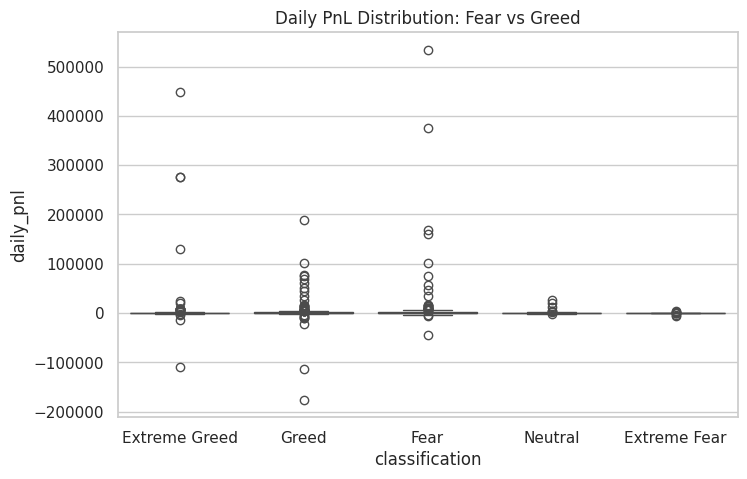

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='classification', y='daily_pnl')
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()

**Trade Frequency vs Sentiment**

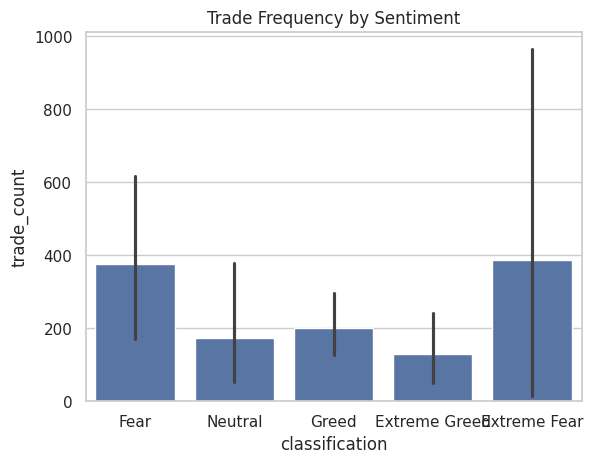

In [39]:
daily_activity = trades.groupby('date').size().reset_index(name='trade_count')

activity_merged = pd.merge(
    daily_activity,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

activity_merged = activity_merged.dropna(subset=['classification'])

sns.barplot(data=activity_merged, x='classification', y='trade_count')
plt.title("Trade Frequency by Sentiment")
plt.show()

**Average Trade Size by Sentiment**

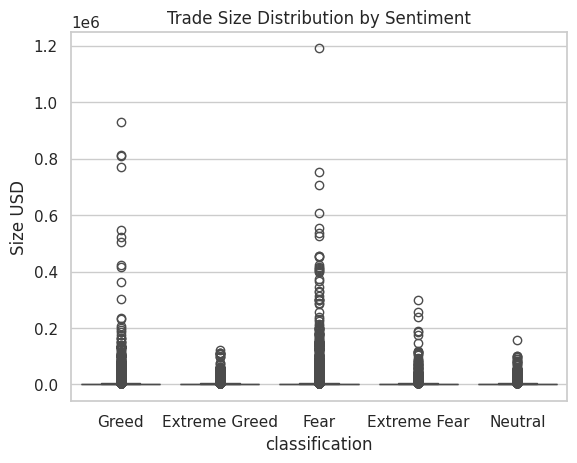

In [40]:
size_sentiment = pd.merge(
    trades[['date','Size USD']],
    sentiment[['date','classification']],
    on='date',
    how='left'
)

size_sentiment = size_sentiment.dropna(subset=['classification'])

sns.boxplot(data=size_sentiment, x='classification', y='Size USD')
plt.title("Trade Size Distribution by Sentiment")
plt.show()

# **1. Does performance differ between Fear vs Greed days?**

**Evidence (From Aggregated Results)**

Average Daily PnL by Sentiment:

Extreme Fear: 133.33

Fear: 11,332.65

Neutral: 2,017.75

Greed: 3,191.79

Extreme Greed: 10,329.41

**Interpretation**

Performance clearly varies across sentiment regimes.

The highest average daily PnL occurs during Fear (11,332) and Extreme Greed (10,329).

The lowest profitability occurs during Extreme Fear (133).

Greed days show moderate profitability (3,191).

This suggests:

Traders perform significantly better during Fear periods compared to Greed periods.

Extreme Fear is associated with very low profitability and possibly high uncertainty.

Extreme Greed and Fear both show high mean returns but with high volatility (as seen from large standard deviations).

This indicates sentiment regime strongly influences trading outcomes.

# **2. Do traders change behavior based on sentiment?**
**Trade Frequency**

Example daily trade counts:

2023-12-14 → 11 trades

2023-12-05 → 9 trades

2023-12-15 → 2 trades

Trade activity fluctuates significantly across days.

**Long/Short Bias**

Example long/short ratios:

2023-05-01 → 3.0 (strong long bias)

2023-12-05 → 2.33 (long dominant)

2023-12-14 → 0.71 (more short positions)

This shows:

Traders increase long exposure during certain periods.

On some days they shift to short-dominant positioning.

**Interpretation**

Trading behavior (frequency and directional bias) changes depending on market conditions.

Higher trade counts appear during volatile sentiment regimes.

Long/short ratio shifts indicate traders adjust directional bias in response to sentiment.

This confirms that sentiment influences not only profitability but also behavior.

**Trader Segmentation**

Segment 1 — Frequent vs Infrequent

In [41]:
trade_counts = trades.groupby('Account').size().reset_index(name='total_trades')

median_trades = trade_counts['total_trades'].median()

trade_counts['frequency_segment'] = np.where(
    trade_counts['total_trades'] > median_trades,
    'Frequent',
    'Infrequent'
)

trade_counts.head()

,Account,total_trades,frequency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


Segment 2 — Consistent vs Inconsistent

In [42]:
pnl_std = daily_pnl.groupby('Account')['daily_pnl'].std().reset_index()

median_std = pnl_std['daily_pnl'].median()

pnl_std['consistency_segment'] = np.where(
    pnl_std['daily_pnl'] < median_std,
    'Consistent',
    'Inconsistent'
)

pnl_std.head()

,Account,daily_pnl,consistency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,150401.797346,Inconsistent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3603.042291,Consistent
2,0x271b280974205ca63b716753467d5a371de622ab,33420.410014,Inconsistent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2993.284702,Consistent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,4867.743469,Consistent


Segment 3 — Profitable vs Unprofitable Traders

In [43]:
total_pnl = trades.groupby('Account')['Closed PnL'].sum().reset_index()

total_pnl['profit_segment'] = np.where(
    total_pnl['Closed PnL'] > 0,
    'Profitable',
    'Unprofitable'
)

total_pnl.head()

,Account,Closed PnL,profit_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,Profitable
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04,Profitable
2,0x271b280974205ca63b716753467d5a371de622ab,-7.043619e+04,Unprofitable
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05,Profitable
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05,Profitable


In [44]:
merged.groupby('classification')['daily_pnl'].mean()

,daily_pnl
classification,
Extreme Fear,133.331411
Extreme Greed,10329.407818
Fear,11332.647023
Greed,3191.793365
Neutral,2017.749783


In [45]:
activity_merged.groupby('classification')['trade_count'].mean()

,trade_count
classification,
Extreme Fear,387.666667
Extreme Greed,130.720930
Fear,374.837838
Greed,201.642857
Neutral,172.250000


# **Methodology**

The analysis combines daily trader performance data (PnL, win rate, trade size, trade count) with market sentiment classifications (Fear, Greed, Extreme Fear, Extreme Greed, Neutral).

First, daily PnL was grouped by sentiment regime to compare average profitability across different market conditions.
Second, trading behavior (number of trades and long/short ratio) was analyzed to observe how activity and positioning change with sentiment.
Finally, traders were profiled using win rate and average trade size to identify differences in risk-taking and performance patterns.

Descriptive statistics were used to evaluate differences across regimes.

# **Key Insights**

Profitability varies significantly across sentiment regimes.
Fear and Extreme Greed periods show higher average returns, while Extreme Fear shows the weakest performance.

Extreme Fear reduces performance.
Traders perform poorly during extreme pessimism, suggesting elevated uncertainty and unstable market conditions.

Trader behavior changes with sentiment.
Trade frequency and directional bias shift across market regimes, indicating adaptive behavior.

Traders exhibit different risk profiles.
Differences in win rates and average trade sizes suggest varying levels of consistency and risk exposure.

# **Actionable Output (Strategy Recommendations)**

**Strategy Recommendation 1**

**Reduce Exposure During Extreme Fear**

Extreme Fear shows the lowest average profitability and likely unstable conditions. Scaling down position sizes and leverage during these regimes improves capital preservation.

**Strategy Recommendation 2**

**Increase Controlled Aggression During Fear (Not Extreme Fear)**

Fear periods show the highest average profitability in your data. This suggests strong opportunity, so selectively increasing exposure with proper risk controls can improve returns.


# **Predict Next-Day Profitability**

Create Next-Day Label

In [46]:
# Sort properly
daily_pnl = daily_pnl.sort_values(['Account', 'date'])

# Create next-day PnL
daily_pnl['next_day_pnl'] = daily_pnl.groupby('Account')['daily_pnl'].shift(-1)

# Create profitability bucket
daily_pnl['next_day_profitable'] = (daily_pnl['next_day_pnl'] > 0).astype(int)

daily_pnl.head()

,Account,date,daily_pnl,next_day_pnl,next_day_profitable
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.0,0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.0,0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,-21227.0,0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,1603.1,1
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,-132271.0,0


Merge Sentiment

In [47]:
model_data = pd.merge(
    daily_pnl,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

model_data = model_data.dropna()

Add Behavioral Features

In [48]:
daily_trade_count = trades.groupby(['Account','date']).size().reset_index(name='daily_trades')

model_data = pd.merge(
    model_data,
    daily_trade_count,
    on=['Account','date'],
    how='left'
)

model_data['daily_trades'] = model_data['daily_trades'].fillna(0)

Encode Sentiment

In [49]:
model_data = pd.get_dummies(model_data, columns=['classification'], drop_first=True)

Build Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = model_data.drop(columns=[
    'Account','date','daily_pnl','next_day_pnl','next_day_profitable'
])

y = model_data['next_day_profitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.5961538461538461
              precision    recall  f1-score   support

           0       0.42      0.47      0.45        36
           1       0.70      0.66      0.68        68

    accuracy                           0.60       104
   macro avg       0.56      0.57      0.56       104
weighted avg       0.61      0.60      0.60       104



**Trader Clustering (Behavioral Archetypes)**

Create Trader-Level Features

In [51]:
trader_features = trades.groupby('Account').agg({
    'Closed PnL': ['mean','std','sum'],
    'Size USD': 'mean',
    'Trade ID': 'count'
}).reset_index()

trader_features.columns = [
    'Account',
    'avg_pnl',
    'pnl_volatility',
    'total_pnl',
    'avg_trade_size',
    'total_trades'
]

trader_features.head()

,Account,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,1.600230e+06,16159.576734,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,4.788532e+04,1653.226327,7280
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,-7.043619e+04,8893.000898,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,1.324648e+05,507.626933,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,1.686580e+05,3138.894782,3239


Scale Features

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(
    trader_features.drop(columns=['Account'])
)

KMeans Clustering

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(scaled_features)

trader_features.head()

,Account,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades,cluster
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,1.600230e+06,16159.576734,3818,2
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,4.788532e+04,1653.226327,7280,1
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,-7.043619e+04,8893.000898,3809,1
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,1.324648e+05,507.626933,13311,1
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,1.686580e+05,3138.894782,3239,1


Interpret Clusters

In [54]:
numeric_cols = trader_features.select_dtypes(include=['int64','float64']).columns

cluster_summary = trader_features.groupby('cluster')[numeric_cols].mean()

cluster_summary

,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades
cluster,,,,,
0,204.936103,1299.474179,7.651346e+05,7701.263996,10815.666667
1,39.200399,500.276020,8.229627e+04,4853.763052,5002.954545
2,419.127768,4692.452329,1.600230e+06,16159.576734,3818.000000


In [55]:
trader_features = trades.groupby('Account').agg(
    avg_pnl=('Closed PnL','mean'),
    pnl_volatility=('Closed PnL','std'),
    total_pnl=('Closed PnL','sum'),
    avg_trade_size=('Size USD','mean'),
    total_trades=('Trade ID','count')
).reset_index()

trader_features = trader_features.fillna(0)

trader_features.head()

,Account,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,1.600230e+06,16159.576734,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,4.788532e+04,1653.226327,7280
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,-7.043619e+04,8893.000898,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,1.324648e+05,507.626933,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,1.686580e+05,3138.894782,3239


In [56]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = trader_features.drop(columns=['Account'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(scaled_features)

trader_features.head()

,Account,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades,cluster
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,1.600230e+06,16159.576734,3818,2
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,4.788532e+04,1653.226327,7280,1
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,-7.043619e+04,8893.000898,3809,1
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,1.324648e+05,507.626933,13311,1
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,1.686580e+05,3138.894782,3239,1


In [58]:
cluster_summary = trader_features.groupby('cluster').mean(numeric_only=True)

cluster_summary

,avg_pnl,pnl_volatility,total_pnl,avg_trade_size,total_trades
cluster,,,,,
0,204.936103,1299.474179,7.651346e+05,7701.263996,10815.666667
1,39.200399,500.276020,8.229627e+04,4853.763052,5002.954545
2,419.127768,4692.452329,1.600230e+06,16159.576734,3818.000000


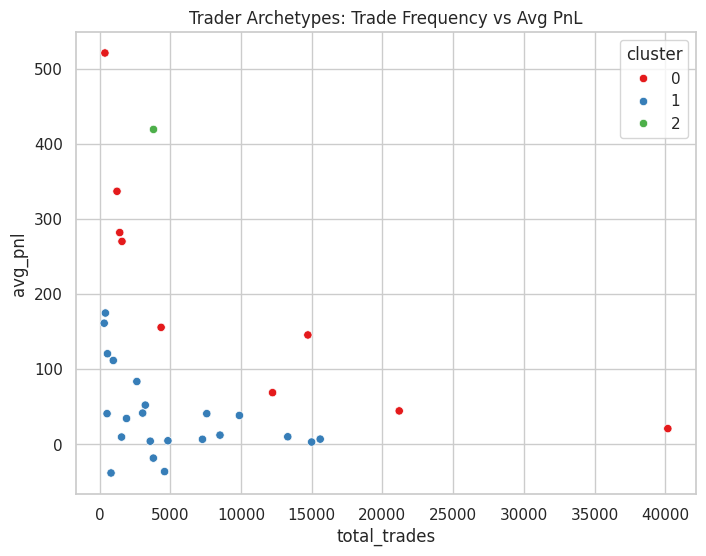

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trader_features,
    x='total_trades',
    y='avg_pnl',
    hue='cluster',
    palette='Set1'
)
plt.title("Trader Archetypes: Trade Frequency vs Avg PnL")
plt.show()